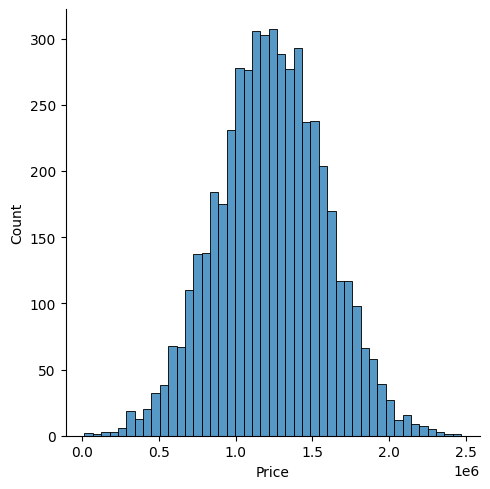

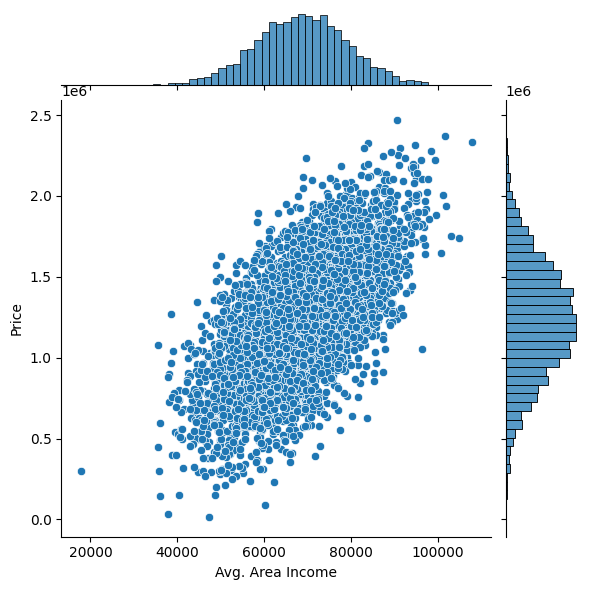

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read_csv可用於遠端也可在地匯入資料
df = pd.read_csv("https://raw.githubusercontent.com/ryanchung403/dataset/main/Housing_Dataset_Sample.csv")

df.head(n=6)
df.describe().T
sns.displot(df['Price'])
sns.jointplot(x=df['Avg. Area Income'],y=df['Price'])







In [ ]:
X=df.iloc[:,:5]
y=df['Price']
from sklearn.model_selection import train_test_split

#訓練模型
#train_test_split可以分割資料成訓練模型與測試模型兩部分(test_size可以設定比例)，random_state=54控制切出同樣結果)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=54)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
predictions=reg.predict(X_test)
predictions



array([ 614607.96220736, 1849444.80372637, 1118945.08884252, ...,
        834789.03428572, 1787928.1090692 , 1455422.23696487])

In [ ]:
#匯出訓練模型的結果，比對準確度
from sklearn.metrics import r2_score
r2_score(y_test,predictions)


0.9216604865707125

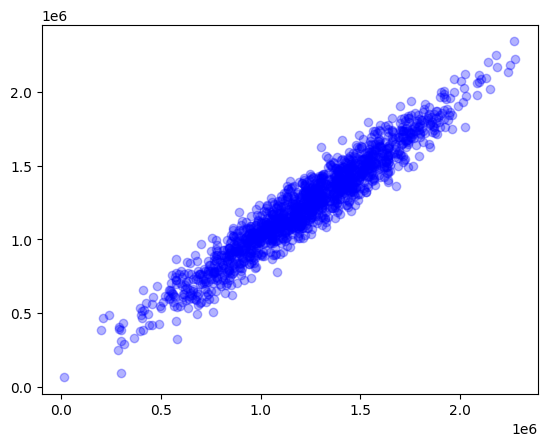

In [ ]:
plt.scatter(y_test,predictions,color='blue',alpha=0.3)

作業部分
===
這次主要分別使用兩種不同的方式，分別為**1.修改分割比例**與**2.使用不同模型**

分割比例部分
---
包含其他訓練模型，讓其輸出在分割比例0.2~0.3間以0.01為單位進行輸出r2_sorce值，並對其進行觀察。

模型部分
---
此次使用的模型包含
- Ridgecv
- SVR(rbf與linear核心)
- Lasso
- RandomForestRegressor
- GradientBoostingRegressor
- ElasticNet
- Make_pipeline[交互作用項]
- 集成模型  
此外還有使用多項式特徵轉換搭配線性回歸模型。  
進行觀察並嘗試是否能夠突破準確度0.92的瓶頸。


In [ ]:
#只調整輸出比例
for i in range(200,310,10):
    size=i/1000
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    predictions=reg.predict(X_test)
    predictions
    print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.921869019942864
test size= 0.21 r2_score= 0.9200512851947507
test size= 0.22 r2_score= 0.9209458613501075
test size= 0.23 r2_score= 0.9217015917437545
test size= 0.24 r2_score= 0.9213385499471134
test size= 0.25 r2_score= 0.9218415939601141
test size= 0.26 r2_score= 0.921449290195693
test size= 0.27 r2_score= 0.9224197366805341
test size= 0.28 r2_score= 0.9225144408070034
test size= 0.29 r2_score= 0.9227374820848958
test size= 0.3 r2_score= 0.9216604865707125


In [ ]:
#嘗試使用新的模型訓練，課程使用線性回歸模型，這次使用RidgeCV
from sklearn.linear_model import RidgeCV
reg1=RidgeCV()
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  reg1.fit(X_train,y_train)
  predictions=reg1.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.9218701949542312
test size= 0.21 r2_score= 0.9200540847003854
test size= 0.22 r2_score= 0.9209484474025521
test size= 0.23 r2_score= 0.9217014068595079
test size= 0.24 r2_score= 0.9213408214921208
test size= 0.25 r2_score= 0.9218426459999839
test size= 0.26 r2_score= 0.9214514420912117
test size= 0.27 r2_score= 0.9224206659790466
test size= 0.28 r2_score= 0.9225161315260413
test size= 0.29 r2_score= 0.922738921176906
test size= 0.3 r2_score= 0.9216627933406366


In [ ]:
#嘗試將資料進行多項式特徵轉換，再使用線性回歸，看能是否用稍微提供非線性的方式提高準確度
from sklearn.preprocessing import PolynomialFeatures
#將次數設為二次
poly_feature=PolynomialFeatures(degree=2)
X_poly=poly_feature.fit_transform(X)

for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=size,random_state=54)
  reg.fit(X_train,y_train)
  predictions=reg.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.9208867087891688
test size= 0.21 r2_score= 0.9190913323159462
test size= 0.22 r2_score= 0.9198644472514477
test size= 0.23 r2_score= 0.9206478479429718
test size= 0.24 r2_score= 0.9203256067145833
test size= 0.25 r2_score= 0.9210124285369798
test size= 0.26 r2_score= 0.9207238539016702
test size= 0.27 r2_score= 0.9216884528846784
test size= 0.28 r2_score= 0.9217500027002636
test size= 0.29 r2_score= 0.9219894288720817
test size= 0.3 r2_score= 0.9210593838799145


In [ ]:
#嘗試使用SVM處理，使用rbf核心
from sklearn.svm import SVR
svr=SVR(gamma='scale')
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  svr.fit(X_train,y_train)
  predictions=svr.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))
#直接降到1%不到的準確度，看來rbf核心不是個處理此資料的好方式

test size= 0.2 r2_score= 0.00038990648988790344
test size= 0.21 r2_score= -0.00012953879969801463
test size= 0.22 r2_score= 0.0003084748680629579
test size= 0.23 r2_score= 0.0003229024842422712
test size= 0.24 r2_score= 0.00039979595426509196
test size= 0.25 r2_score= 0.0002573280536193323
test size= 0.26 r2_score= -0.00020089267614809003
test size= 0.27 r2_score= -0.00040242428861536617
test size= 0.28 r2_score= 0.00013441184288032204
test size= 0.29 r2_score= 0.0003371740502564613
test size= 0.3 r2_score= 0.00039489429938344145


In [ ]:
#將核心改成線性
svr=SVR(kernel='linear',gamma='scale')
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  svr.fit(X_train,y_train)
  predictions=svr.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.5879158750272261
test size= 0.21 r2_score= 0.5869185897844743
test size= 0.22 r2_score= 0.5866042619995452
test size= 0.23 r2_score= 0.5849195784574357
test size= 0.24 r2_score= 0.581504383279166
test size= 0.25 r2_score= 0.5842825335992681
test size= 0.26 r2_score= 0.5862285605833185
test size= 0.27 r2_score= 0.5853296299959893
test size= 0.28 r2_score= 0.585407613941665
test size= 0.29 r2_score= 0.5856873647310391
test size= 0.3 r2_score= 0.5855226284805827


In [ ]:
#嘗試使用Lasso
from sklearn.linear_model import Lasso
reg2=Lasso()
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  reg2.fit(X_train,y_train)
  predictions=reg2.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.9218691148934646
test size= 0.21 r2_score= 0.9200514110468901
test size= 0.22 r2_score= 0.9209459882431341
test size= 0.23 r2_score= 0.9217016948679647
test size= 0.24 r2_score= 0.9213386469636282
test size= 0.25 r2_score= 0.9218416822757555
test size= 0.26 r2_score= 0.9214493892820312
test size= 0.27 r2_score= 0.9224198168827153
test size= 0.28 r2_score= 0.9225145237009134
test size= 0.29 r2_score= 0.9227375714640587
test size= 0.3 r2_score= 0.921660592496617


In [ ]:
#嘗試將LinearRegression、Ridgecv跟Lasso做成集成模型
from sklearn.ensemble import VotingRegressor
ensemble_reg=VotingRegressor(estimators=[('lasso',reg2),('linear',reg),('ridge',reg1)])
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  ensemble_reg.fit(X_train,y_train)
  predictions=ensemble_reg.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.9218694565818382
test size= 0.21 r2_score= 0.9200522688806987
test size= 0.22 r2_score= 0.9209467730628871
test size= 0.23 r2_score= 0.921701583468787
test size= 0.24 r2_score= 0.9213393477036985
test size= 0.25 r2_score= 0.921841981932833
test size= 0.26 r2_score= 0.9214500567077936
test size= 0.27 r2_score= 0.9224200808545188
test size= 0.28 r2_score= 0.9225150436577151
test size= 0.29 r2_score= 0.9227380181504645
test size= 0.3 r2_score= 0.9216613007343863


In [ ]:
#試試gpt說的交互作用項
from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(degree=10,include_bias=False,interaction_only=True),LinearRegression())
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  model.fit(X_train,y_train)
  predictions=model.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.920756456210908
test size= 0.21 r2_score= 0.9189532126814446
test size= 0.22 r2_score= 0.9196406842717246
test size= 0.23 r2_score= 0.9203180309669173
test size= 0.24 r2_score= 0.91998567882651
test size= 0.25 r2_score= 0.9205771788770958
test size= 0.26 r2_score= 0.9201731239913756
test size= 0.27 r2_score= 0.9210564923539717
test size= 0.28 r2_score= 0.9211692988085083
test size= 0.29 r2_score= 0.9213470747404978
test size= 0.3 r2_score= 0.9204438407472918


In [ ]:
#嘗試用隨機樹林回歸
from sklearn.ensemble import RandomForestRegressor
reg3=RandomForestRegressor()
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  reg3.fit(X_train,y_train)
  predictions=reg3.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.8928784130417061
test size= 0.21 r2_score= 0.8913342311862407
test size= 0.22 r2_score= 0.8917886551658498
test size= 0.23 r2_score= 0.8903615720750018
test size= 0.24 r2_score= 0.8895979608629692
test size= 0.25 r2_score= 0.891978323553965
test size= 0.26 r2_score= 0.8909275589493494
test size= 0.27 r2_score= 0.8910162827581352
test size= 0.28 r2_score= 0.8893679289474575
test size= 0.29 r2_score= 0.8899009247994963
test size= 0.3 r2_score= 0.8905396125592153


In [ ]:
#嘗試梯度提升決策樹回歸
from sklearn.ensemble import GradientBoostingRegressor
reg4=GradientBoostingRegressor()
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  reg4.fit(X_train,y_train)
  predictions=reg4.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.9085334743838436
test size= 0.21 r2_score= 0.9075307749244174
test size= 0.22 r2_score= 0.906513317269264
test size= 0.23 r2_score= 0.908151331930607
test size= 0.24 r2_score= 0.9083964786168435
test size= 0.25 r2_score= 0.9091011975308775
test size= 0.26 r2_score= 0.9079705356658735
test size= 0.27 r2_score= 0.9078637115090631
test size= 0.28 r2_score= 0.9078758763956654
test size= 0.29 r2_score= 0.9089494613134191
test size= 0.3 r2_score= 0.906107174405366


In [ ]:
#使用ElasticNet
from sklearn.linear_model import ElasticNet
net=ElasticNet(alpha=0.1,l1_ratio=0.5)
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  net.fit(X_train,y_train)
  predictions=net.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.9211577175048203
test size= 0.21 r2_score= 0.9195541382348489
test size= 0.22 r2_score= 0.9204288495601254
test size= 0.23 r2_score= 0.9210939230029356
test size= 0.24 r2_score= 0.9206990570343936
test size= 0.25 r2_score= 0.921147199642151
test size= 0.26 r2_score= 0.9208684241423893
test size= 0.27 r2_score= 0.9216399367605546
test size= 0.28 r2_score= 0.9217443262690808
test size= 0.29 r2_score= 0.9219602543383716
test size= 0.3 r2_score= 0.9210169258122926


In [ ]:
#嘗試把非線性與線性都加入集成
ensemble_reg1=VotingRegressor(estimators=[('lasso',reg2),('linear',reg),('ridge',reg1),('randomtree',reg3)])
for i in range(200,310,10):
  size=i/1000
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=54)
  ensemble_reg1.fit(X_train,y_train)
  predictions=ensemble_reg1.predict(X_test)
  predictions
  print('test size=',size,'r2_score=',r2_score(y_test,predictions))

test size= 0.2 r2_score= 0.9202097344290765
test size= 0.21 r2_score= 0.918819812170845
test size= 0.22 r2_score= 0.9197560727615317
test size= 0.23 r2_score= 0.9203477744210589
test size= 0.24 r2_score= 0.9199059991143965
test size= 0.25 r2_score= 0.9202261116144468
test size= 0.26 r2_score= 0.9201075053871699
test size= 0.27 r2_score= 0.9205681126458245
test size= 0.28 r2_score= 0.9207285489387083
test size= 0.29 r2_score= 0.9208430557704905
test size= 0.3 r2_score= 0.9197905197703824


結論
===
**修改分割比例部分**  
觀察輸出結果可以發現，調整分割比例並無法大幅提高準確度。  
**使用不同模型**  
觀察輸出結果可以發現，線性模型的準確度基本都在0.92附近，而非線性類模型的準確度都不太高，決策樹回歸大約只有0.9的準確度。
心得
==
雖然沒辦法提升模型的準確度，但從這次的作業，我看到了模型需要對應適合的資料才能夠做出準確的運算，希望在之後的模型選用上能夠更加熟練。